## 좀 늦었지만.. https://wikidocs.net/book/2155 에 있는 내용에 대해 정리하고 다시 공부하는 시간을 가져보고자 한다.
## 현재 konlpy는 아직 다운되지 않은 상태.


In [2]:
# pandas , numpy, matplotlib 
import pandas as pd
import numpy as np
import matplotlib as mlp
print(pd.__version__)
print(np.__version__)
print(mlp.__version__)

1.5.3
1.23.5
3.7.0


### pandas series
1차원 배열값에 대응되는 index를 부여할 수 있는 구조

In [3]:
# pandas series
# 1차원 배열값에 대응되는 index를 부여할 수 있는 구조
arr = pd.Series([500,1000,2000,4000], index = ["껌","과자",'빵','맥주'])
print(arr)
print(" ")
print(arr.index)
print(" ")
print(arr.values)
# if you want to make new series with its own index, values you can do it like this
ar1 = arr.index
ar2 = arr.values
print(type(ar1), type(ar2))
print(list(ar1) , ar2)


껌      500
과자    1000
빵     2000
맥주    4000
dtype: int64
 
Index(['껌', '과자', '빵', '맥주'], dtype='object')
 
[ 500 1000 2000 4000]
<class 'pandas.core.indexes.base.Index'> <class 'numpy.ndarray'>
['껌', '과자', '빵', '맥주'] [ 500 1000 2000 4000]


In [4]:
# if you want to put a value in a string
print(f'what the fuck {ar1[0]}') 

what the fuck 껌


### pandas DataFrame

데이터프레임은 2차원 리스트를 매개변수로 전달합니다. 2차원이므로 행방향 인덱스(index)와 열방향 인덱스(column)가 존재합니다. 다시 말해 행과 열을 가지는 자료구조입니다. 시리즈가 인덱스(index)와 값(values)으로 구성된다면, 데이터프레임은 열(columns)까지 추가되어 열(columns), 인덱스(index), 값(values)으로 구성됩니다. 이 세 개의 구성 요소로부터 데이터프레임을 생성해봅시다.

In [5]:
# pandas Dataframe
val = [[1,2,3,4], [5,6,7,8],[9,10,11,12]]
idx = ['one', 'two','three']
cols = ['alpha', 'beta','gamma','omega']
df = pd.DataFrame(val,idx,cols)
print(df)

       alpha  beta  gamma  omega
one        1     2      3      4
two        5     6      7      8
three      9    10     11     12


In [6]:
# list can be changed to dataFrame
data= [['a','b','c','d'] , ['!','@','#','$'], ['o','p','q','r']]
print(pd.DataFrame(data),"\n")
print(pd.DataFrame(data, index=['ㄱ','ㄴ','ㄷ']),"\n")
print(pd.DataFrame(data, index=['ㄱ','ㄴ','ㄷ'] , columns=['fir','sec','thr','four']))

   0  1  2  3
0  a  b  c  d
1  !  @  #  $
2  o  p  q  r 

   0  1  2  3
ㄱ  a  b  c  d
ㄴ  !  @  #  $
ㄷ  o  p  q  r 

  fir sec thr four
ㄱ   a   b   c    d
ㄴ   !   @   #    $
ㄷ   o   p   q    r


In [7]:
# dictionary를 통해 dataframe을 생성할 수 있음
dic = {
    "name" : ['john', 'amy','adelade','kate','robert'],
    "age" : [27,30,18,16,43],
    "hobby":['basketball','tennis','swimming','running','football']
}
dic_to_df = pd.DataFrame(dic)
print(dic_to_df,"\n")
# can be changed by using index like this.
dic_to_df.index=['one','two','three','four','five']
print(dic_to_df)

      name  age       hobby
0     john   27  basketball
1      amy   30      tennis
2  adelade   18    swimming
3     kate   16     running
4   robert   43    football 

          name  age       hobby
one       john   27  basketball
two        amy   30      tennis
three  adelade   18    swimming
four      kate   16     running
five    robert   43    football


### Dataframe 조회하기
* df.head(n) - 앞 부분을 n개만 보기 
* df.tail(n) - 뒷 부분을 n개만 보기
* df['열이름'] - 해당되는 열을 확인

In [8]:
print(df.head(2))
print(df.head(-2))
print(df.tail(1),'\n\n')

print(df.loc['one']) # df.loc for named row 
print(df.iloc[0]) # df.iloc for integer row

     alpha  beta  gamma  omega
one      1     2      3      4
two      5     6      7      8
     alpha  beta  gamma  omega
one      1     2      3      4
       alpha  beta  gamma  omega
three      9    10     11     12 


alpha    1
beta     2
gamma    3
omega    4
Name: one, dtype: int64
alpha    1
beta     2
gamma    3
omega    4
Name: one, dtype: int64


### 외부 데이터 읽기
Pandas는 CSV, 텍스트, Excel, SQL, HTML, JSON 등 다양한 데이터 파일을 읽고 데이터 프레임을 생성할 수 있습니다.

예를 들어 csv 파일을 읽을 때는 pandas.read_csv()를 통해 읽을 수 있습니다.

In [9]:
# 일단 to_csv로 해당 album_classification에 csv파일을 하나 만들고
# 그 다음 진행시켜보자
# df_to_csv = df.to_csv("/Users/junny/Desktop/Pytorch_Study/album_classification",sep=',',na_rep='missing value')
# 저렇게 define하는게 아니고
df.to_csv("/Users/junny/Desktop/Pytorch_Study/album_classification/df_to_csv.csv",sep=',',na_rep='missing value')



In [10]:
# csv로 만들어 주는 애는 따로 define되어서 사용하는게 아니고 그냥 저거 자체만 쓰면 알아서 쓰이는 형태
new_csv = pd.read_csv('df_to_csv.csv')
print(new_csv)

  Unnamed: 0  alpha  beta  gamma  omega
0        one      1     2      3      4
1        two      5     6      7      8
2      three      9    10     11     12


### 이제는 numpy
 Numpy의 핵심이라고 불리는 다차원 행렬 자료구조인 ndarray를 통해 벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용됩니다. Numpy는 편의성뿐만 아니라, 속도면에서도 순수 파이썬에 비해 압도적으로 빠르다는 장점이 있습니다.

In [17]:
print(np.array([3,2,1]) , type(np.array([3,2,1])))
print(np.array([[1,2,3],[4,5,6]]), type(np.array([[1,2,3],[4,5,6]])))
print(np.array(['aa','b','c']),type(np.array(['aa','b','c'])))

[3 2 1] <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>
['aa' 'b' 'c'] <class 'numpy.ndarray'>


we can notice that 둘다 ndarray형태
Numpy 배열에는 ```축의 개수(ndim)``` 와 ``` 크기(shape)``` 라는 개념이 존재하는데, 배열의 크기를 정확히 숙지하는 것은 딥 러닝에서 매우 중요합니다. 축의 개수와 크기가 어떤 의미를 가지는지에 대해서는 머신 러닝 챕터에서 벡터와 행렬 연산을 설명할 때 언급하겠습니다.



In [19]:
# np.zeros, ones,full,eye,random ,,,
print(np.zeros((5,2)), "\n")
print(np.ones((5,2)), "\n")
print(np.full((3,5) , ['a','b','c','d','e']) , "\n")
print(np.eye(3))
print(np.random.random((5,3)),"\n")
print(np.arange(1,10),"\n")
print(np.arange(3,11,2))
print(np.array(np.arange(30)).reshape((10,3)))
# you can reshape an array to multi-dimensional ones
# 24면 2*3*4 로 해도 되고 12*2 이래도 되니까 

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 

[['a' 'b' 'c' 'd' 'e']
 ['a' 'b' 'c' 'd' 'e']
 ['a' 'b' 'c' 'd' 'e']] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.687553   0.65621698 0.31990158]
 [0.26405262 0.18585764 0.78837976]
 [0.78333744 0.56195113 0.81485342]
 [0.92817566 0.15318084 0.66637712]
 [0.12897793 0.70527862 0.39805936]] 

[1 2 3 4 5 6 7 8 9] 

[3 5 7 9]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]


In [ ]:
# 참고로 np.ndarray는 잘 쓰이지 않는 기법..
# np.array는 ndarray클래스를 만들기 위한 function이고
# np.ndarray도 따로 있지만 not recommended라고 한다.

In [30]:
# Slicing 
mat = np.array([[1,2,3],[4,5,6]])
print(mat[0])
print(mat[0,:])
print(mat[:,1]) # 두번째 열 출력
print(mat)


[1 2 3]
[1 2 3]
[2 5]
[[1 2 3]
 [4 5 6]]


In [32]:
mat = np.array([[1, 2], [4, 5], [7, 8]])
print(mat)
print(mat[1][0])
print(mat[1,0])# fancy indexing
# you can make 2 specific values to a new array
new_arr = mat[[2,1],[0,0]]
# 근데 여기서 계산법이 다름.. -> 
# mat[[2행, 1행],[0열, 0열]]
# 각 행과 열의 쌍을 매칭하면 2행 0열 ((2,0)의 위치), 1행 0열 ((1,0)의 위치)의 두 개의 원소.
print(new_arr)

[[1 2]
 [4 5]
 [7 8]]
4
4
[7 4]


기존 python list 자체의 연산은 안되었지만
ndarray끼리의 연산은 가능하다.

In [38]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x+y)
print(x+y+2) # 2를 각각의 위치마다 더해주는 꼴
print(np.add(x,y),"\n")
print(x-y)
print(np.subtract(x,y),"\n")
print(x*y)
print(np.multiply(x,y),"\n")
print(y/x)
print(np.divide(y,x),"\n")

# dot product
mat1 = np.array([[1,2],[3,4]])
mat2 = np.array([[5,6],[7,8]])
mat3 = np.dot(mat1, mat2)
print(mat3)

[5 7 9]
[ 7  9 11]
[5 7 9] 

[-3 -3 -3]
[-3 -3 -3] 

[ 4 10 18]
[ 4 10 18] 

[4.  2.5 2. ]
[4.  2.5 2. ] 

[[19 22]
 [43 50]]


### MatPlotLib(맷플롯립)
맷플롯립(Matplotlib)은 데이터를 차트(chart)나 플롯(plot)으로 ```시각화하는 패키지입니다```. 데이터 분석에서 Matplotlib은 데이터 분석 이전에 데이터 이해를 위한 시각화나, 데이터 분석 후에 결과를 ```시각화```하기 위해서 사용됩니다. 

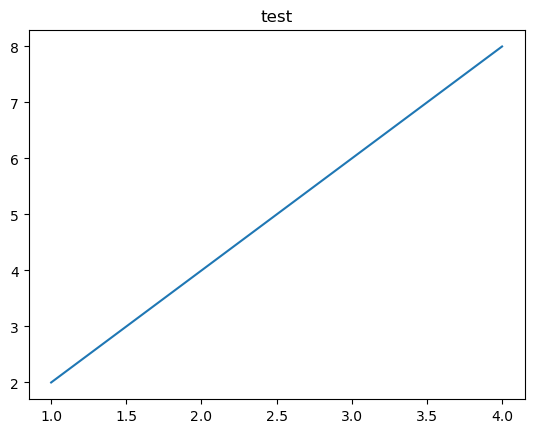

In [41]:
import matplotlib.pyplot as plt
plt.title('test')
plt.plot([1,2,3,4],[2,4,6,8])
plt.show()

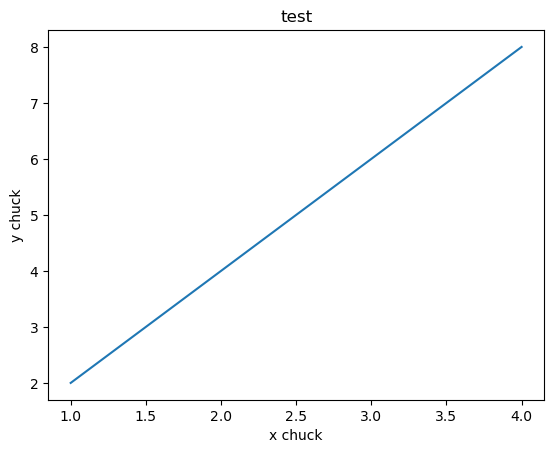

In [44]:
plt.title('test')
plt.plot([1,2,3,4],[2,4,6,8])
plt.xlabel('x chuck')
plt.ylabel('y chuck')
plt.show()

### line 추가
다수의 plot()을 하나의 그래프에 나타낼 수 있습니다. 여러개의 라인 플롯을 동시에 사용할 경우에는 각 선이 어떤 데이터를 나타내는지를 보여주기 위해 ```범례(legend)```를 사용할 수 있습니다.

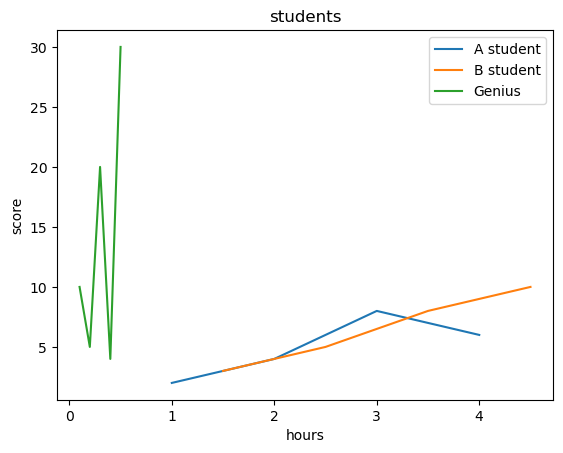

In [48]:
plt.title('students')
plt.plot([1,2,3,4],[2,4,8,6])
plt.plot([1.5,2.5,3.5,4.5],[3,5,8,10]) # 라인 새로 추가
plt.plot([0.1,0.2,0.3,0.4,0.5],[10,5,20,4,30])
plt.xlabel('hours')
plt.ylabel('score')
plt.legend(['A student', 'B student','Genius','fucker']) # 범례 삽입
plt.show()
# plot의 수와 legend의 수와 달라도 돌아가긴 하지만 표에 뜨진 않음

예전에 내가 ```numpy_pandas_re``` 라고 
공부해둔거 ipynb가 있었는데
그거를 다시 여기에 복붙해둘 예정

In [49]:
# I downloaded numpy(numerical python) in version 3.9.13 
l1 = [1,2,3,4]
arr = np.array(l1)
print(type(l1) , type(arr))
print(l1 , arr)
# numpy의 array의 type이 ndarray인 거고 실제로 define할때는 np.array 이런식으로 작성해야 한다.
print(arr.shape ) # l1(list형)은 shape가 없다. -> shape shows the size  of the array
# (4,) 이렇게 생긴건 1차원일때만,
print(len(l1) , len(arr))
ar = np.array([[[1,2,3],[4,5,6],[7,8,9]]])
print(ar.shape , ar.ndim)

<class 'list'> <class 'numpy.ndarray'>
[1, 2, 3, 4] [1 2 3 4]
(4,)
4 4
(1, 3, 3) 3


In [50]:
arr2 = np.arange(20)
print(arr2)
arr3 = np.arange(2,10)
print(arr3)
l2 = range(2,30)
print(type(l2), l2[0])
print(type(arr3)) # ndarray객체를 반환한다.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[2 3 4 5 6 7 8 9]
<class 'range'> 2
<class 'numpy.ndarray'>


In [51]:
print(np.zeros((2,3)))
print(np.zeros(((3,4,5))))
# zero들을 생성

[[0. 0. 0.]
 [0. 0. 0.]]
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [52]:
print(np.full((3,4), 10)) # 딱 보면 알거라고 생각한다.
print(np.full(((3,4,3)), -1))

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]]


In [53]:
print(np.eye(3))
print(np.eye(4))
print(np.eye(5))
# making the 단위행렬

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [54]:
print(type(np.zeros(3))) # np.zero 자체의 type
print(np.zeros(3).dtype) # ndarray의 속성값의 type

<class 'numpy.ndarray'>
float64


In [55]:
# numpy 산술연산
arr = np.array([[1,2,3],[4,5,6]])
print(arr)
print(arr*2)
print(arr*arr)
print(arr-arr)
print(arr**0.5)
print(arr*2>=arr*arr) # this also returns the Boolean value

[[1 2 3]
 [4 5 6]]
[[ 2  4  6]
 [ 8 10 12]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
[[ True  True False]
 [False False False]]


In [56]:
# View and Copy
# numpy's array has the characteristic of 'view'
arr = np.arange(3,11)
print(arr)
arr[3] = 121
print(arr)

[ 3  4  5  6  7  8  9 10]
[  3   4   5 121   7   8   9  10]


In [57]:
# 여기서 재밌는 일이 벌어진다
ar_temp = arr[4:7]
ar_temp[0]= -37
print(ar_temp)
print(arr) # 이 결과를 보면 알겠지만 
# data는 복사되지 않고 view에 대한 변경은 그대로 원본 배열에 반영이 된다.

[-37   8   9]
[  3   4   5 121 -37   8   9  10]


In [58]:
# 단순히 slice를 하면 모든 값을 할당함
print(ar_temp)
ar_temp[:]= 111
print(ar_temp)
print(arr)

[-37   8   9]
[111 111 111]
[  3   4   5 121 111 111 111  10]


In [59]:
# copy본을 얻고 싶으면 -> .copy()를 써야한다.
ar_new_temp = arr[:-1].copy()
print(ar_new_temp)
ar_new_temp[0]=30
print(ar_new_temp)
print(arr)

[  3   4   5 121 111 111 111]
[ 30   4   5 121 111 111 111]
[  3   4   5 121 111 111 111  10]


In [60]:
arr2 = np.zeros((3,4))
arr2[0][1]=10
print(arr2)
arr2[0,2]=11 # 이렇게 해도 상관은 없음
print(arr2)

[[ 0. 10.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0. 10. 11.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### 그니까
copy() 
-> 원본과 복사본이 ```별개```  
   즉, 서로 영향을 미치지 않음  
   즉, 복사본 배열이 데이터를 개별 소유 가능  
   즉. ``` 깊은 복사 ```  
   ex : .copy() {대신 pure python에선 .copy()해도 얕은복사}

view()
-> 원본과 복사본이 ```서로 영향```  
    즉, 서로 영향 끼침  
    즉, 복사본 배열이 데이터 개별 소유 ```불```가능  
    즉, ``` 얕은 복사 ```  
    ex : slicing, .view()

NumPy 배열 객체의 base 속성 이용.

※ copy()로 생성된 배열 (= 데이터 개별 소유 O) 경우, None 반환.

※ view()로 생성된 배열 (= 데이터 개별 소유 X) 경우, 원본 배열 반환.

In [61]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

x = arr.copy()

y = arr.view()

print(x.base) # None

print(y.base) # [1 2 3 4 5]

None
[1 2 3 4 5]


In [62]:
# slicing 
arr2d =np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(arr2d)
print(arr2d[:])
print(arr2d[:2])
print(arr2d[:-1])
# 다른점을 체크해보세요

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [63]:
print(arr2d[:2, 1:])
print(arr2d[:2, :-1])
print(arr2d[2, 1:])
print(arr2d[:, 1:])
print(arr2d[:, -1])
# 뭐가 어떻게 되는건지 확인해보세요

[[2 3]
 [5 6]]
[[1 2]
 [4 5]]
[8 9]
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]]
[ 3  6  9 12]


In [64]:
# randnum
names = np.array(['kim','lee','park','choi','jung'])
data = np.random.randn(7,4)
print(names)
print(data)

['kim' 'lee' 'park' 'choi' 'jung']
[[-0.69494277 -0.4613996  -0.01831939  0.75588866]
 [ 0.54931593  0.90000052 -0.16409847  0.87293473]
 [ 1.32815393 -1.18467496  0.3093613  -1.16712142]
 [-0.92320635  2.31337616 -0.21679674  1.10520928]
 [-1.30814332 -0.27928814  0.58463186  0.52266399]
 [ 0.60596553 -0.96320444 -0.1512901   0.73583977]
 [-1.17578576 -0.25005459  2.19555925  0.41993458]]


In [65]:
# 일단 indexing하려는 축의 길이가 같아야함.. 그래야 위와같은 indexing error가 뜨지 않겠죠?
names=np.append(names,np.array(['moon','hwang']))
print(names)

['kim' 'lee' 'park' 'choi' 'jung' 'moon' 'hwang']


In [66]:
data[names=='jung']
# names=='jung' 인 놈중 true값만 index로 쓰임

array([[-1.30814332, -0.27928814,  0.58463186,  0.52266399]])

In [67]:
data[names=='jung', 1] # ㄴspecific하게 고를 수 있음

array([-0.27928814])

In [68]:
# not , != & | 사용 가능
data[~(names=='jung')] # 여기선 names=='jung'이 true 아니면 false로 나오는 binary니까 bitwise하게 생각해도됨
# 그래서 ~이 붙은거고
# boolean 배열에서는 and, or 같은 논리연산자(&& || !) 보다 비트연산자(& | ~)로 움직인다고 생각하자

array([[-0.69494277, -0.4613996 , -0.01831939,  0.75588866],
       [ 0.54931593,  0.90000052, -0.16409847,  0.87293473],
       [ 1.32815393, -1.18467496,  0.3093613 , -1.16712142],
       [-0.92320635,  2.31337616, -0.21679674,  1.10520928],
       [ 0.60596553, -0.96320444, -0.1512901 ,  0.73583977],
       [-1.17578576, -0.25005459,  2.19555925,  0.41993458]])

In [69]:
# Fancy Indexing
arr = np.empty((3,6))
for i in range(3):
    arr[i] = i
print(arr)

[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]]


In [70]:
# if you want to select specific ordered rows just 원하는 순서가 명시된 정수가 담긴 ndarray를 넘기면 된다
print(arr[[0,1]])
print(arr[[1,2]])

[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]]


In [71]:
# 만약 정수가 아닌 다른 애들이면?
test = np.array([['a','b','c'],['d','e','f'],['g','h','i'],['11','22','33']])
print(test[[0,2]]) # 옹 되네?
print(test[[-1,-3,0,1,1,1,1,1]]) # 신기하넹

[['a' 'b' 'c']
 ['g' 'h' 'i']]
[['11' '22' '33']
 ['d' 'e' 'f']
 ['a' 'b' 'c']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']]


In [72]:
# let's see what happens in multi indexed array
test= np.arange(45).reshape((5,3,3))
print(test)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]]


In [73]:
print(test[0,1]) # 이건 팬시 인덱싱이 아니지
print(test[[0,1]]) # 이래야 팬시 인덱싱
print(test[[0,2,4]])

[3 4 5]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]]


In [74]:
print(test[[0,2,3,4],[0,0,2,1],[0,0,0,0]]) # 잘 따져서 봐보셈

[ 0 18 33 39]


In [75]:
# transpose 특성 정리
A = np.arange(12).reshape(3,4)
print(A)
print(A.T)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [76]:
print(A.transpose())
print(np.transpose(A))

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [77]:
AA = np.arange(24).reshape((2,3,4))
print(AA) # 2by3by4
print(AA.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)


In [78]:
print(AA.T)# 4by 3by2
print(AA.T.shape)

[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
(4, 3, 2)


In [79]:
print(AA.transpose(1,2,0)) 
print(AA.transpose(1,2,0).shape) 
# 이렇게 하면 특정한 shape의 transpose를 구할 수 있음

[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [80]:
print(np.transpose(AA,(1,2,0))) # 이렇게 해도 상관은 없넹 

[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]


In [81]:
# Series는 array랑 비슷하다고 봐도 됨
ex = pd.Series([4,5,6,7])
print(ex)
print(type(ex))
print(ex.values)
print(type(ex.values)) # 보면 numpy의 ndarray의 형태임을 알 수 있음
print(len(ex))
print(ex.index) # series의 range라고 봐도 됨


0    4
1    5
2    6
3    7
dtype: int64
<class 'pandas.core.series.Series'>
[4 5 6 7]
<class 'numpy.ndarray'>
4
RangeIndex(start=0, stop=4, step=1)


In [82]:
# you can choose the index of its series
ex2 = pd.Series([4,3,2,1], index = ['가','나','다','라'])
print(ex2)
print(ex2.index)
print(type(ex2.index))
print(ex2.index.shape)
print(ex2.index[1])
# 결과를 보고 유추를 해보자


가    4
나    3
다    2
라    1
dtype: int64
Index(['가', '나', '다', '라'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
(4,)
나


In [83]:
# you can use index for selecting values
print(ex2['가'])
print(ex2['다'])
# this kind of operation could be used in series too
print(ex2[ex2>2])
alpha = ex2[ex2>2]
print(type(alpha))
print(" ")
print(ex2*2)
print(" ")
print(np.exp(ex2)) # e^4 , e^3 .... 이런식으로?

4
2
가    4
나    3
dtype: int64
<class 'pandas.core.series.Series'>
 
가    8
나    6
다    4
라    2
dtype: int64
 
가    54.598150
나    20.085537
다     7.389056
라     2.718282
dtype: float64


In [84]:
'가' in ex2

True

In [85]:
'j' in ex2

False

In [86]:
# if dictionary is needed , you can use dict and series together
dat = {'seoul':50000 , 'daegu':20000 , 'busan':35000 , 'ulsan':28000}
se = pd.Series(dat)
print(se)

seoul    50000
daegu    20000
busan    35000
ulsan    28000
dtype: int64


In [87]:
# or you can choose an index if you want
cities= ['seoul', 'daejeon', 'daegu', 'incheon']
se2 = pd.Series(dat, index = cities)
print(se2) # index와 맞지않는 value는 NaN

seoul      50000.0
daejeon        NaN
daegu      20000.0
incheon        NaN
dtype: float64


In [88]:
# isnull, not null 같은 애들도 있다.
print(pd.isnull(se2))
print(pd.notnull(se2))
print(pd.isnull(se2) == pd.notnull(se2))



seoul      False
daejeon     True
daegu      False
incheon     True
dtype: bool
seoul       True
daejeon    False
daegu       True
incheon    False
dtype: bool
seoul      False
daejeon    False
daegu      False
incheon    False
dtype: bool


In [89]:
alpha = pd.Series([6,2,3,1], index = ['seoul', 'daejeon', 'daegu','busan'])
beta = pd.Series([0,9,4,11] , index = ['daejeon','ulsan', 'busan','seoul'])
print(alpha + beta) # 하나라도 없는애가 나오면 Nan을 찍넹

busan       5.0
daegu       NaN
daejeon     2.0
seoul      17.0
ulsan       NaN
dtype: float64


In [90]:
# series 자체와 series의 INDEX 각각 모두 이름을 가질 수 있음
alpha.name = 'junny'
alpha.index.name = 'cities'
print(alpha)

cities
seoul      6
daejeon    2
daegu      3
busan      1
Name: junny, dtype: int64


In [91]:
# Dataframe -> you can use this dataframe with
# rows , cols can have their own indices itself
data = {
    'cities':['seoul','daegu', 'seoul','yongin', 'daegu','incheon','yongin'],
    'year':[1999,2000,2001,2000,1999,2002,2001],
    'pop':[1.5,1.7,3.6,2.5,2.4,2.0,3.8]
    }
frame = pd.DataFrame(data)
print(frame)

    cities  year  pop
0    seoul  1999  1.5
1    daegu  2000  1.7
2    seoul  2001  3.6
3   yongin  2000  2.5
4    daegu  1999  2.4
5  incheon  2002  2.0
6   yongin  2001  3.8


In [92]:
print(frame.head()) # 앞에 5개 , head안에 param 넣으면 그 숫자만큼의 rows select됨

   cities  year  pop
0   seoul  1999  1.5
1   daegu  2000  1.7
2   seoul  2001  3.6
3  yongin  2000  2.5
4   daegu  1999  2.4


In [93]:
print(pd.DataFrame(data, columns=['pop','cities'])) # column의 순서에 따른 새로운 dataframe 생성 가능 


   pop   cities
0  1.5    seoul
1  1.7    daegu
2  3.6    seoul
3  2.5   yongin
4  2.4    daegu
5  2.0  incheon
6  3.8   yongin


In [94]:
# Series와 마찬가지로 dict에 없는 값을 넘기면 Nan
frame2 = pd.DataFrame(data, columns=['year','cities','pop','hello_world'],
         index=['alpha','beta','gamma','delta','epsilon','pi','omega']              
    )
print(frame2)

         year   cities  pop hello_world
alpha    1999    seoul  1.5         NaN
beta     2000    daegu  1.7         NaN
gamma    2001    seoul  3.6         NaN
delta    2000   yongin  2.5         NaN
epsilon  1999    daegu  2.4         NaN
pi       2002  incheon  2.0         NaN
omega    2001   yongin  3.8         NaN


In [95]:
print(frame2.columns)
print(frame2.index)


Index(['year', 'cities', 'pop', 'hello_world'], dtype='object')
Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'pi', 'omega'], dtype='object')


In [96]:
# Series랑 비슷함 
print(frame2['cities'])
print(frame2.year) # frame2.column_name = frame2['column_name']
print(frame2['year'])


alpha        seoul
beta         daegu
gamma        seoul
delta       yongin
epsilon      daegu
pi         incheon
omega       yongin
Name: cities, dtype: object
alpha      1999
beta       2000
gamma      2001
delta      2000
epsilon    1999
pi         2002
omega      2001
Name: year, dtype: int64
alpha      1999
beta       2000
gamma      2001
delta      2000
epsilon    1999
pi         2002
omega      2001
Name: year, dtype: int64


In [97]:
# when we use loc and iloc
print(frame2.loc['gamma']) # 이놈의 index도 Index(['year', 'cities', 'pop', 'hello_world'], dtype='object') 로 나오겠징
print(" ")
print(frame2.iloc[2]) # iloc가 index형태 loc가 그냥 col_name



year            2001
cities         seoul
pop              3.6
hello_world      NaN
Name: gamma, dtype: object
 
year            2001
cities         seoul
pop              3.6
hello_world      NaN
Name: gamma, dtype: object


In [98]:
# you can put a value in column
frame2.hello_world = 90
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5           90
beta     2000    daegu  1.7           90
gamma    2001    seoul  3.6           90
delta    2000   yongin  2.5           90
epsilon  1999    daegu  2.4           90
pi       2002  incheon  2.0           90
omega    2001   yongin  3.8           90


In [99]:
frame2['hello_world'] = np.arange(len(frame2.hello_world.index))
print(frame2) 
# 이런식으로 해도 되겠죠

         year   cities  pop  hello_world
alpha    1999    seoul  1.5            0
beta     2000    daegu  1.7            1
gamma    2001    seoul  3.6            2
delta    2000   yongin  2.5            3
epsilon  1999    daegu  2.4            4
pi       2002  incheon  2.0            5
omega    2001   yongin  3.8            6


In [100]:
# if you want to put a list or array to DATAFRAME
# len(list or array) == Dataframe's len
# if you want to put a Series -> non existing value would be replaced to Nan

val = pd.Series([-1,-3,-8], index = ['gamma','omega','pi'])
frame2.hello_world = val 
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5          NaN
beta     2000    daegu  1.7          NaN
gamma    2001    seoul  3.6         -1.0
delta    2000   yongin  2.5          NaN
epsilon  1999    daegu  2.4          NaN
pi       2002  incheon  2.0         -8.0
omega    2001   yongin  3.8         -3.0


In [101]:
# if you put an non existing column -> new column is being created.
#frame2.new_one = frame2['cities']=='yongin' -> serWarning: Pandas doesn't allow columns to be created via a new attribute name
frame2['new_one'] = frame2['cities']=='yongin' 
print(frame2)
# 새로운 col 생성할때는 .형식이 아닌 기존의 [''] 방식으로 해야 하나보다.

         year   cities  pop  hello_world  new_one
alpha    1999    seoul  1.5          NaN    False
beta     2000    daegu  1.7          NaN    False
gamma    2001    seoul  3.6         -1.0    False
delta    2000   yongin  2.5          NaN     True
epsilon  1999    daegu  2.4          NaN    False
pi       2002  incheon  2.0         -8.0    False
omega    2001   yongin  3.8         -3.0     True


In [102]:
# you can delete a column by usin 'del' 
del frame2['new_one']
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5          NaN
beta     2000    daegu  1.7          NaN
gamma    2001    seoul  3.6         -1.0
delta    2000   yongin  2.5          NaN
epsilon  1999    daegu  2.4          NaN
pi       2002  incheon  2.0         -8.0
omega    2001   yongin  3.8         -3.0


In [103]:
# you can use 중첩된(nested) dict to make a new data
pop = {'seoul':{1999:1.5 , 2001:3.6},'daegu':{1999:2.4 , 2000:1.7}}
# 이 중첩된 dict을 DataFrame에 넘기면 바깥에 있는 dict의 key는 col이 되고 안에있는 key 는 row가된다.
frame3 = pd.DataFrame(pop)
print(frame3)
# see how the nested dict works as a Dataframe!!!

      seoul  daegu
1999    1.5    2.4
2001    3.6    NaN
2000    NaN    1.7


In [104]:
np.transpose(frame3)

,1999,2001,2000
seoul,1.5,3.6,NaN
daegu,2.4,NaN,1.7


In [105]:
print(frame3.values)
print(frame2.values)
print(frame2.index)
print(frame3.columns)

[[1.5 2.4]
 [3.6 nan]
 [nan 1.7]]
[[1999 'seoul' 1.5 nan]
 [2000 'daegu' 1.7 nan]
 [2001 'seoul' 3.6 -1.0]
 [2000 'yongin' 2.5 nan]
 [1999 'daegu' 2.4 nan]
 [2002 'incheon' 2.0 -8.0]
 [2001 'yongin' 3.8 -3.0]]
Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'pi', 'omega'], dtype='object')
Index(['seoul', 'daegu'], dtype='object')


In [107]:
# index can have overlapped indices
dup_labels= pd.Index(['alpha','alpha','beta','beta','beta'])
print(dup_labels)

Index(['alpha', 'alpha', 'beta', 'beta', 'beta'], dtype='object')


In [108]:
# REINDEXING!!
aa = pd.Series([0,3,-2,7], index = ['q','w','e','r'])
print(aa)
aa_reindexed = aa.reindex(['t','w','e','q','y','r'])
print(aa_reindexed)

q    0
w    3
e   -2
r    7
dtype: int64
t    NaN
w    3.0
e   -2.0
q    0.0
y    NaN
r    7.0
dtype: float64


In [109]:
# 시계열같은 순차적인 데이터를 reindex할때 값을 보간하거나 채워넣어야함
# method 옵션을 활용해 가능 -> ffill을 사용해보자
ob = pd.Series(['blue','red','purple'] , index = [0,2,4])
print(ob)
ob.reindex(range(6), method = 'ffill')
print(ob)
# this does not work as a book's example.. WTF
#책에서는 그냥 인덱스 012345마다 0,1일땐 블루 2,3일땐 레드 4,5일땐 퍼플 이렇게 나옴..

0      blue
2       red
4    purple
dtype: object
0      blue
2       red
4    purple
dtype: object


일단 여기까지.. 했고 
더 배우고 싶고 넣고 싶은 내용은 
``` 파이썬 라이브러리를 활용한 데이터분석``` 책을 보고
알아서 더 넣기  

더 넣으려면 여기 바로 위에부터 차근차근 넣기